# 비지도 학습(Unsupervised Learning)
- 교사 없이 학습하는 방식으로 데이터를 직접 모델링
- 알고리즘이 뭔가 유용한 것을 학습했는지 평가하는 것이 어려움
- 데이터 과학자가 데이터를 더 잘 이해하고 싶을 때 탐색적 분석 단계와 데이터전처리 단계에서 많이 사용함
- 데이터를 잘 이해하기 위해서(탐색적 분석) 사용되거나, 지도학습 알고리즘의 정확도 향상과 메모리/ 시간 절약을 위해 새로운 데이터 표현을 만드는 전처리 단계로 활용
## 종류
### 비지도 변환
- 데이터를 새롭게 표현하여 사람이나 다른 머신러닝 알고리즘이 원시 데이터보다 더 쉽게 해석할 수 있도록 만드는 알고리즘
- 차원축소
### 군집화
- 데이터를 비슷한 것끼리 그룹으로 묶는 것
- 군집화와 유사하지만 테스트 데이터에 사용되는 토픽 모델링이 잇음
## 어려움
- 레이블이 없기 때문에 올바르게 학습되었는지 알고리즘을 평가하기가 어려움


In [1]:
import wget

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
fruits = np.load('C:/Users/Playdata/Downloads/fruits_300.npy')

In [9]:
# 100 * 100 픽셀의 300개의 샘플
print(fruits.shape)

(300, 100, 100)


In [10]:
print(fruits[0,0,:])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


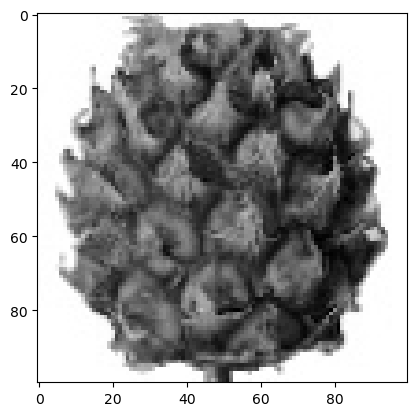

In [17]:
plt.imshow(fruits[160],cmap='gray_r')
plt.show()

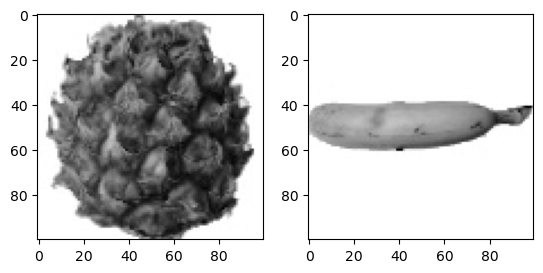

In [18]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100],cmap='gray_r')
axs[1].imshow(fruits[200],cmap='gray_r')
plt.show()

## 샘플 차원 변경하기

In [19]:
# numpy 배열을 나눌때, 100*100 이미지를 펼쳐 길이가 10000인 1차원 배열로 변경
# 이미지 출력은 어렵지만 배열은 계산할 수 있음
apple = fruits[0:100].reshape(-1,100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)

In [20]:
print(apple.shape)

(100, 10000)


In [21]:
# 배열에 들어있는 샘플의 픽셀 평균값을 계산
# 샘플들을 모두 가로로 값을 나열햇으니 axis=1로 지정하여 평균을 계산
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


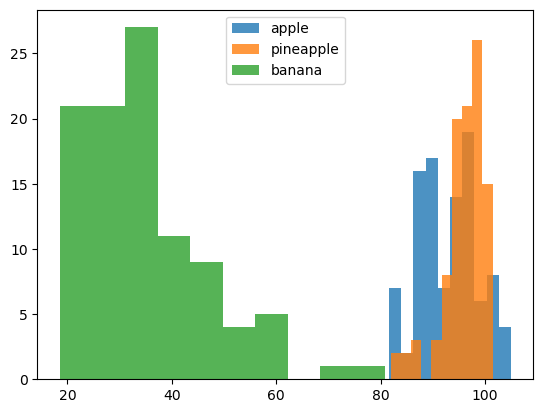

In [23]:
plt.hist(np.mean(apple,axis=1),alpha=0.8)
plt.hist(np.mean(pineapple,axis=1),alpha=0.8)
plt.hist(np.mean(banana,axis=1),alpha=0.8)
plt.legend(['apple','pineapple','banana'])

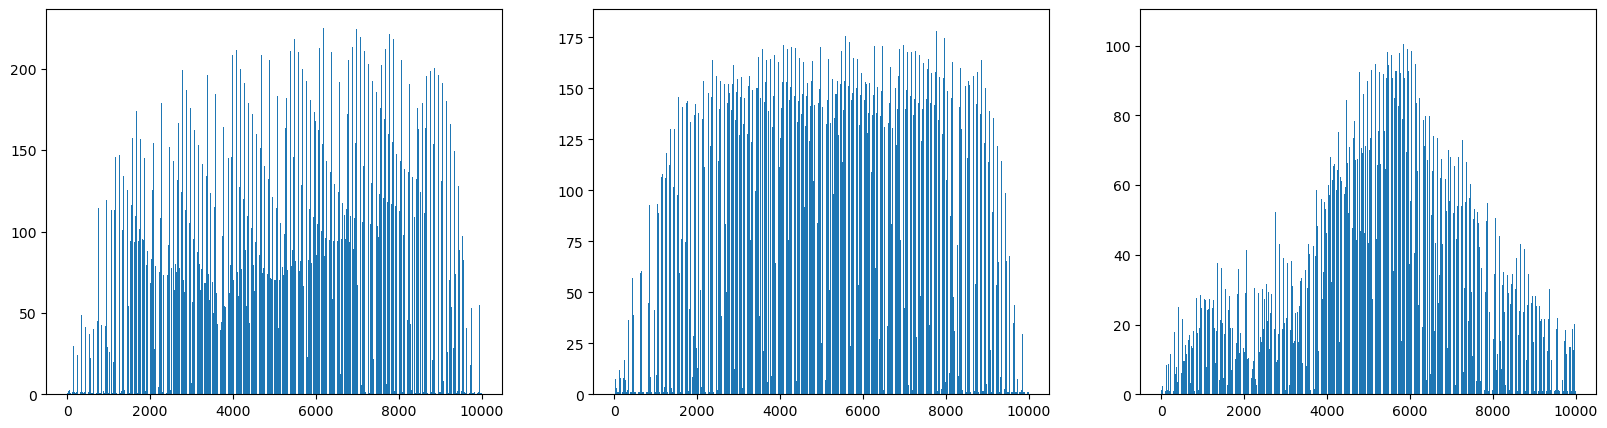

In [24]:
# 바나나는 원통형인 반면 사과와 파인애플은 원형이므로 바나나의 평균값은 40 아래 집중적이고 사과와 파인애플은 겹쳐있음
# 픽셀의 평균값을 비교함
fig,axs = plt.subplots(1,3,figsize=(20,5))
axs[0].bar(range(10000),np.mean(apple,axis=0))
axs[1].bar(range(10000),np.mean(pineapple,axis=0))
axs[2].bar(range(10000),np.mean(banana,axis=0))
plt.show()

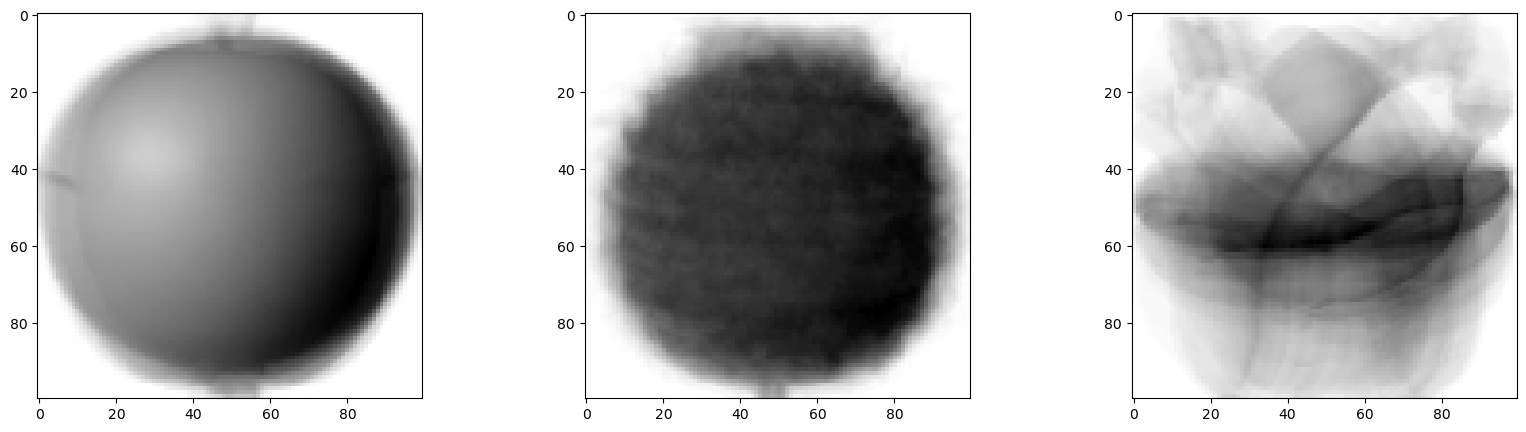

In [26]:
# 픽셀 평균값을 100 * 100 크기로 바꿔서 이미지처럼 출력하여 비교
# 픽셀을 평균 낸 이미지는 모든 사질을 합쳐 놓은 대표 이미지로 생각할 수 있음
apple_mean = np.mean(apple,axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple,axis=0).reshape(100,100)
banana_mean = np.mean(banana,axis=0).reshape(100,100)
fig,axs = plt.subplots(1,3,figsize=(20,5))
axs[0].imshow(apple_mean,cmap='gray_r')
axs[1].imshow(pineapple_mean,cmap='gray_r')
axs[2].imshow(banana_mean,cmap='gray_r')
plt.show()

## 평균값과 가까운 사진 고르기

In [27]:
# 사과 사진의 평균값인 apple_mean과 가장 가까운 사진 고르기
# 1. 절댓값 오차를 사용(모든 샘플 - apple_mean)의 절댓값의 평균
abs_diff = np.abs(fruits-apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


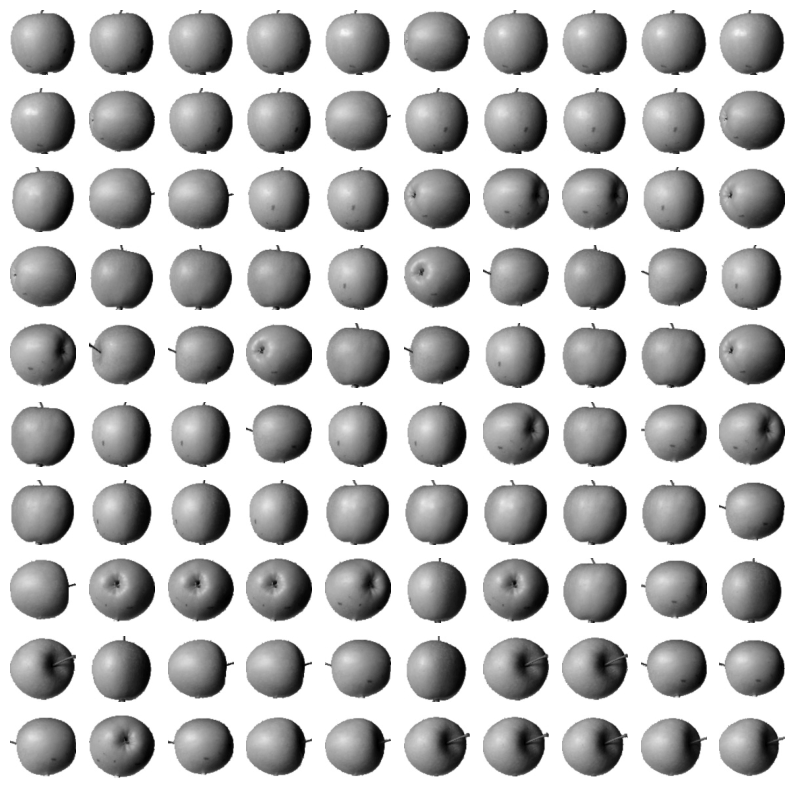

In [28]:
# 가장 작은 순서대로 100개 고르기
# apple_mean과 오차가 가장 작은 샘플 100개
# np.argsort() : 오름차순으로 나열된 배열의 인덱스를 반환함
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i*10 + j]],cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

## 확인

(300,)


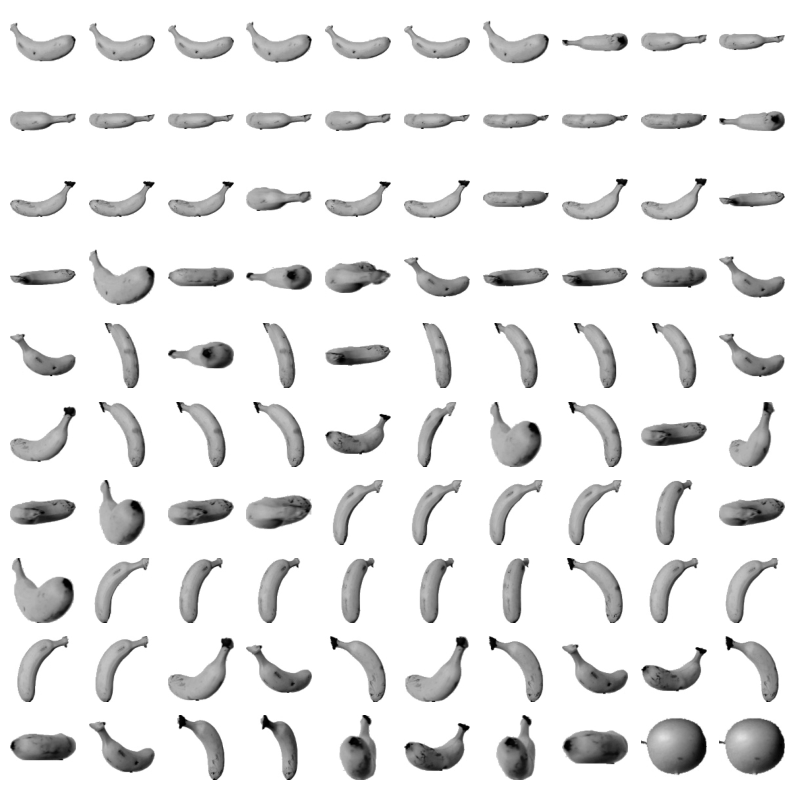

In [29]:
abs_diff = np.abs(fruits-banana_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

banana_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[banana_index[i*10 + j]],cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

(300,)


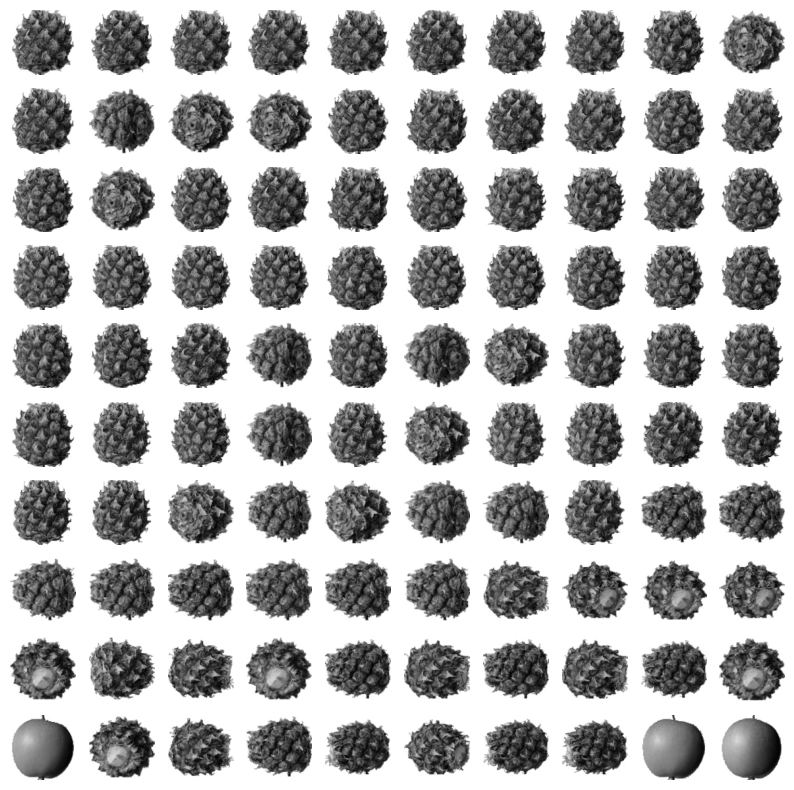

In [30]:
abs_diff = np.abs(fruits-pineapple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

pineapple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[pineapple_index[i*10 + j]],cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

## 군집화(Clustering)
- 데이터 셋을 클러스터 라는 그룹으로 나누는 작업
- 각 데이터 지점을 어느 클러스터에 속하는지 할당함
- 미리 클러스터를 지정하지 않으므로 비지도 학습
## 종류
- k-평균 군집화
    - 계층적(Hierarchical) 군집화
    - 병합 군집화(Agglomerative clustering)
- 밀도기반 군집

<br>

## k-평균(k-mean)군집
- 가장 간단하고 널리 사용하는 군집 알고리즘
- 데이터의 어떤 영역을 대표하는 클러스터 중심을 탖음
- 각 클러스에 할당된 데이터 포인트들의 평균 좌표를 이용, 중심점을 반복적으로 업데이트 하며 클러스터를 형성하는 알고리즘
### step
1. 각 데이터 포인트 i에 대해 가장 가까운 중심점을 찾고, 그 중심점에 해당하는 클러스터를 할당
    가까운 중심점을 찾을 때는 유클리드 거리를 사용함
2. 할당된 클러스터를 기반으로 새로운 중심점을 계산
    중심점은 클러스터 내부 점들 좌표의 산술 평균으로 함
3. 각 클러스터의 할당이 바뀌지 않을 때까지 반복
### 점과 점 사이의 거리 측정
- Manhattan Distance : 각 축에 대해 수직으로만 이동하여 거리를 계산하는 거리 측정방식
- Euclidean Distance : 점과 점 사이의 가장 짧은 거리를 계산하는 거리 측정 방식

In [31]:
# k-means 모델을 훈련하기 위해 샘플 개수, 너비, 높이 크기의 3차원 배열을 샘플개수, 너비*높이 크기를 가진 2차원 배열로 변경
fruits_2d = fruits.reshape(-1,100*100)

In [32]:
# 비지도 학습이므로 fit() 메서드에 타깃 데이터를 사용하지 않음
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,random_state=42)
km.fit(fruits_2d)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [35]:
# 군집된 결과는 KMeans 클래스 객체의 labels_ 속성에 저장
# labels_ 배열의 길이는 샘플 개수와 같음
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [37]:
# 첫 번째 클러스터(레이블 0)이 111개의 샘플을 모았고, 두번째 클러스터가 98개, 세번째 클러스터가 91개를 모음
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))


In [39]:
# 각 클러스터가 어떤 이미지를 나타냈는지 그림으로 출력
import matplotlib.pyplot as plt
def draw_fruits(arr,ratio=1):
    n = len(arr) # n은 샘플의 개수
    # 한 줄에 10개씩 이미지를 그림
    # 샘플의 개수는 10으로 나누어 전체 행 개수를 계산
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열의 개수는 샘플 개수, 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio),squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10+j < n:
                # n개 까지만 그림
                axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

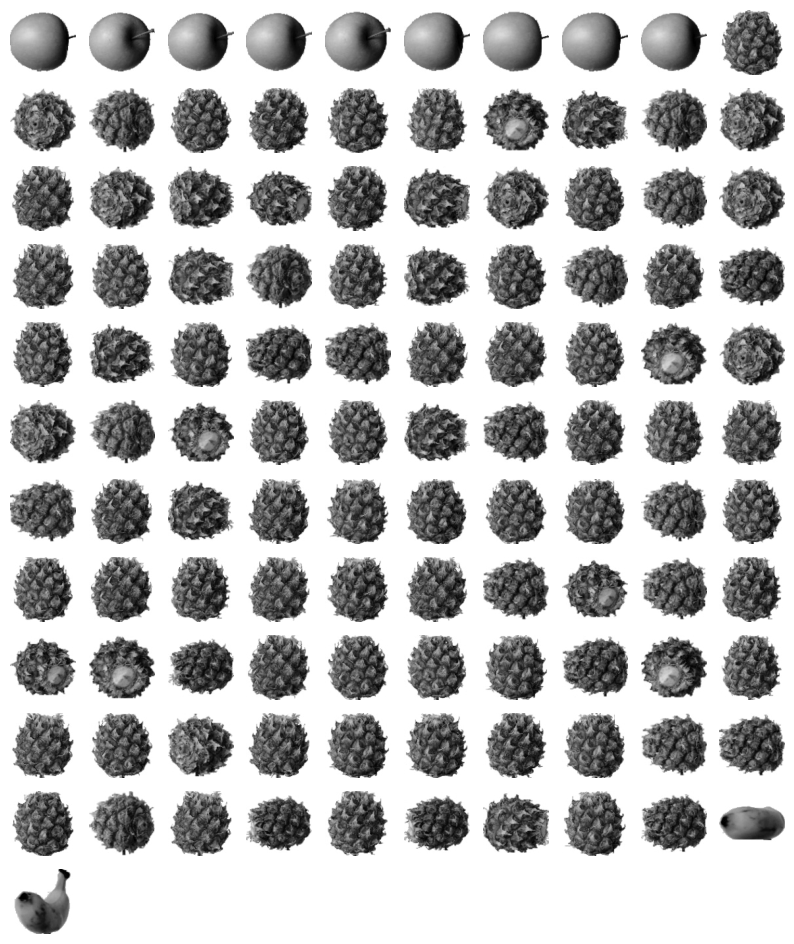

In [43]:
draw_fruits(fruits[km.labels_==0])
# 레이블2는 사과로만, 레이블1은 바나나로만 구성되어 있지만 레이블0인 클러스터는 파인애플에 사과 바나나가 섞여 잇음
# k-means 알고리즘이 샘플들을 완벽하게 구별해내지 못함
# 훈련 데이터에 타깃 레이블을 제공하지 않았음에도 스스로 비슷한 친구들을 모으긴 했음

## 클러스터 중심

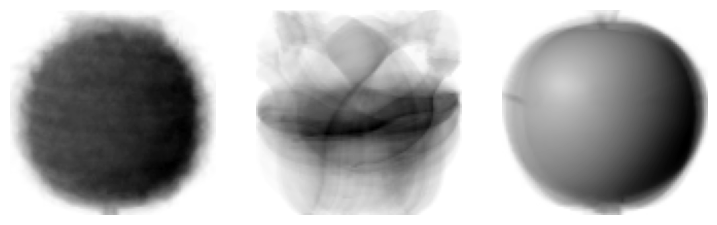

In [44]:
# 최종적으로 찾은 클러스터 중심은 cluster_centers_ 속성에 저장되어 있음
# fruits_2d 클러스터의 중심이기 때문에 2차원 배열로 바꾸어ㅑ 함
draw_fruits(km.cluster_centers_.reshape(-1,100,100),ratio=3)

In [45]:
# 100번째 샘플
# 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환해주는 transform() 메서드를 가지고 있음
# 하나의 샘플을 전달했기 때문에 바노한된 배열은 2차원 배열
# 첫 번째 클러스터까지의 거리가 가장 작으므로 이 샘플은 레이블0에 속한다고 볼수 있음
print(km.transform(fruits_2d[100:101]))

[[3393.8136117  8837.37750892 5267.70439881]]


In [46]:
# 가장 가까운 클러스터중심을 예측하는 클래스를 이용 레이블 예측
print(km.predict(fruits_2d[100:101]))

[0]


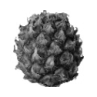

In [47]:
# 레이블 0에 있는 것이 맞는지 확인
draw_fruits(fruits[100:101])

In [48]:
# 반복적으로 클러스터 중심을 옮기면서 최적의 클러스터를 찾음
# 반복한 횟수는 n_iter_에 저장됨
# 지금은 총 4번 반복하여 최적의 클러스터를 찾았음을 확인할 수 있음
print(km.n_iter_)

4


## 최적의 k 찾기
#### 이너셔
- 클러스터 중심과 클러스터에 속한 샘플 사이의 거리의 제곱 합
- 클러스터에 속한 샘플이 얼마나 가깝게 모여있는지를 나타내는 값
- 클러스터의 개수가 늘어나면 클러스터 개개의 크기도 줄고, 이너셔도 줄어듬
#### 엘보우 방법
- 클러스터의 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 클러스터 개수를 찾는 방법
- 클러스터 개수를 증가시키며 이너셔를 그래프로 그리면 감소하는 속도가 꺾이는 지점이 있는데, 그 지점부터는 클러스터 개수를 늘려도 클러스터에 밀집된 정도가 크게 개선되지 않는다. 즉, 이너셔가 크게 줄지 않는다 볼수 있다

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

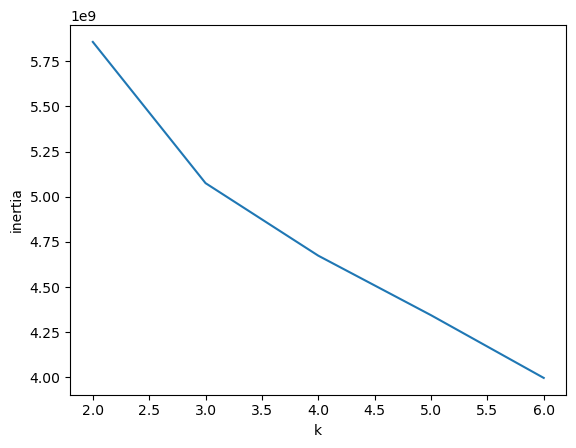

In [49]:
inertia = []
for k in range(2,7):
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
plt.plot(range(2,7),inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

# 꺾이는 지점이 뚜렷하지는 않지만 K=3에서 그래프의 기울기가 조금 바뀐 것을 확인
# 엘보우 지점보다 클러스터 개수가 많아지면 변화가 줄어들며 군집효과도 줄어듬

## K-means 장점
- 비교적 이해하기 쉽고 구현도 쉬울 뿐 아니라 비교적 빠르기 때문에 가장 인기있는 군집 알고리즘
- 대용량 데이터셋에서도 잘 작동
## K-means 단점
- 무작위 초기화를 사용하여 알고리즘의 출력이 난수 초깃값에 따라 달라짐
- 클러스터의 모양을 가정하고 있어서 활용범위가 비교적 제한적
- 찾으려 하는 클러스터 개수를 지정해야 함

## 차원축소(Dimensionality reduction)
- 특성이 너무 많으면 과대적합이 일어남
- 데이터를 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상 시킬 수 있음
- 다시 원본 차원으로 손실을 최대한 줄이고 복원 가능
- 저차원에서는 일어나지 않는 형상들이 고차원에서 데이터를 분석하거나 다눌 때 생겨나는 현상(차원의 저주)
- 고차원으로 올라갈수록 공간의 크기가 많이 커진다. 데이터는 해당 공간에 한정적으로 위치 되어 빈 공간이 많아지기 때문에 발생
- 데이터의 차원이 너무 큰 경우에는 필요없는 변수를 제거하고 과적합을 방지하기 위해 데이터의 차원을 축소함
- 예 : 시각화를 위해 데이터를 2차원으로 변경(평면)

<언제 사용하는가>  <br>
1. 시각화
2. 노이즈 감소
3. 정보를 적은 차원의 공간에 저장하므로 메모리 절약
4. 용량이 적으므로 성능도 좋아짐

#### 주성분 분석(Principal Component Analysis - PCA) : 대표적 차원 축소 알고리즘
데이터에 있는 분산이 큰 방향을 찾는 것
- 분산 : 데이터가 널리 퍼져있는 정도
- 분산이 큰 방향 : 데이터의 분포를 잘 아는 어떤 벡터/ 방향 -> 주성분
- 첫 번째 주성분을 찾은 다음, 이 벡터에 수직이고 분산이 가장 큰 다음 방향(두 번째 주성분)을 찾음
- 주성분은 원본 특성 개수만큼 찾을 수 있음

In [50]:
# n_componenets = 매개변수에 주성분의 개수를 지정
# 비지도 학습이므로 fit()에 타깃값 제공하지 않음
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [51]:
# 주성분 확인
print(pca.components_.shape)
# 50개의 주성분을 찾았음, 두번째 특성은 원본데이터의 특성 개수와 같음

(50, 10000)


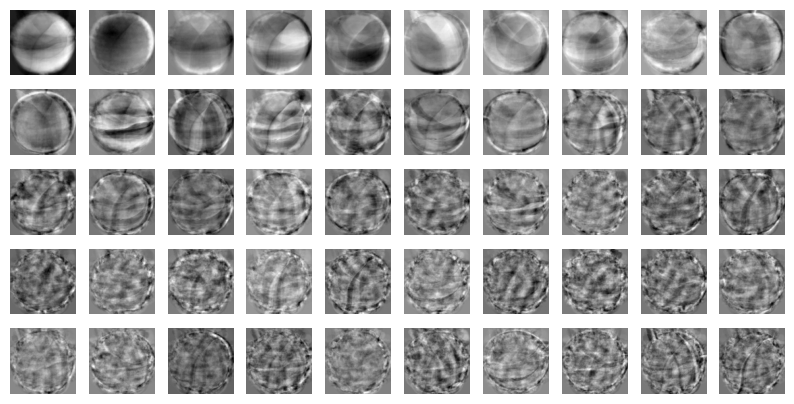

In [52]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [53]:
# 원본 데이터를 주성분에 투영하여 특성의 개수를 10000개에서 50개로 줄일 수 있음
print(fruits_2d.shape)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)
# 10000개의 특성을 가진 300개의 이미지를 50개의 주성분을 찾은 PCA 모델을 사용해
# 50개의 특성을 가진 300개의 이미지로 변경

(300, 10000)
(300, 50)


### 원본 데이터 재구성

In [55]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


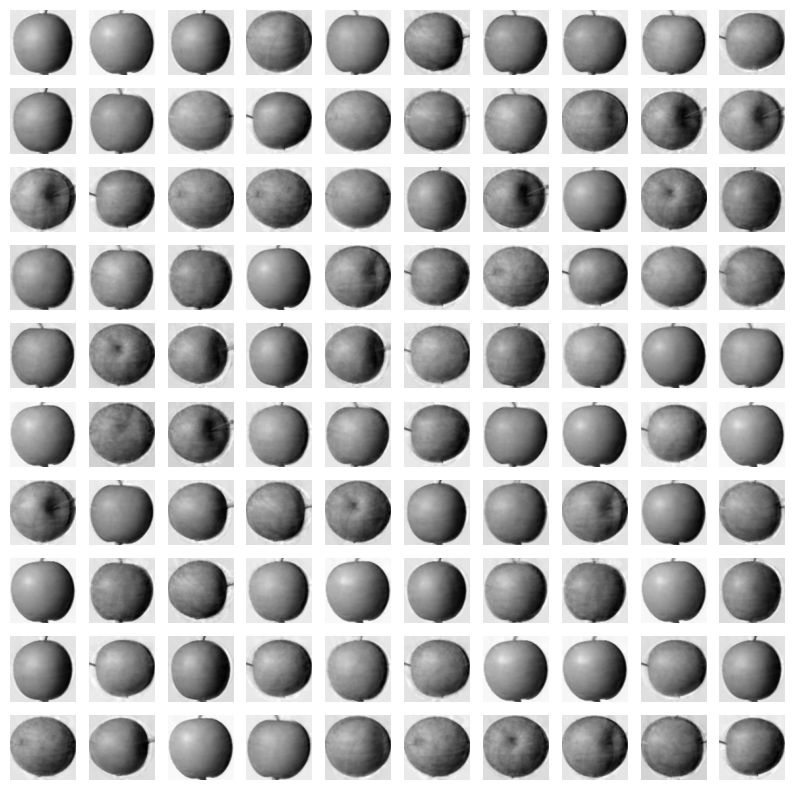

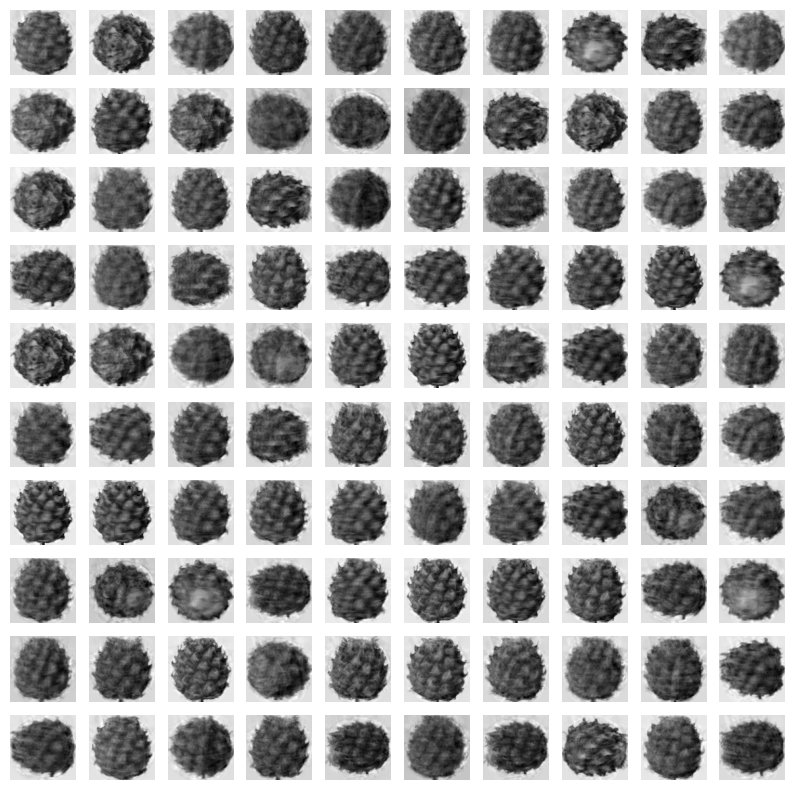

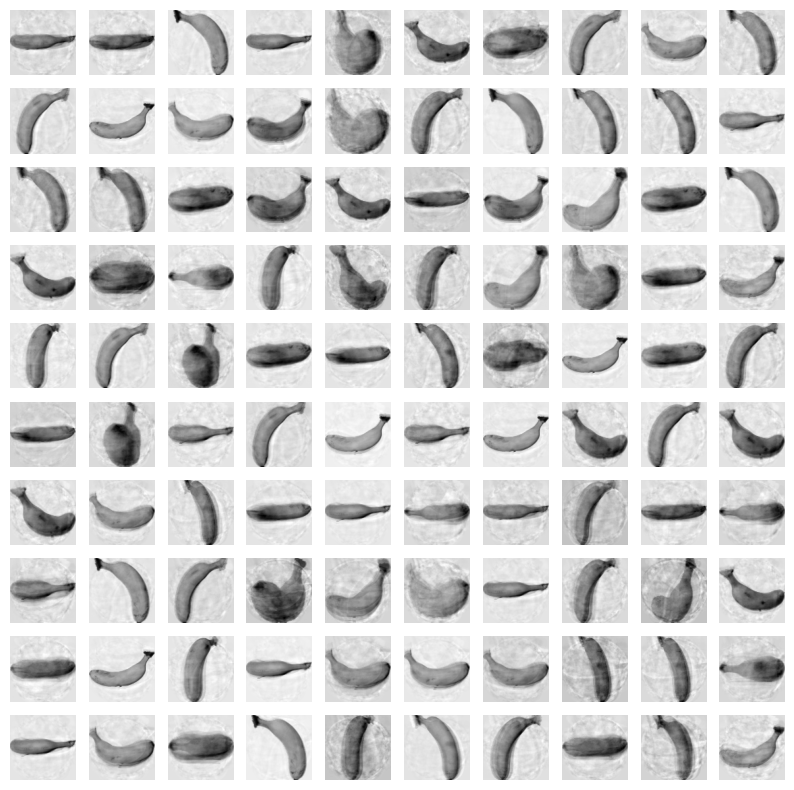

In [56]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

### 설명된 분산
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
- PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있음
- 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율 얻을 수 있음

In [57]:
print(np.sum(pca.explained_variance_ratio_))
# 92프로의 분산을 유지

0.9215457501911692


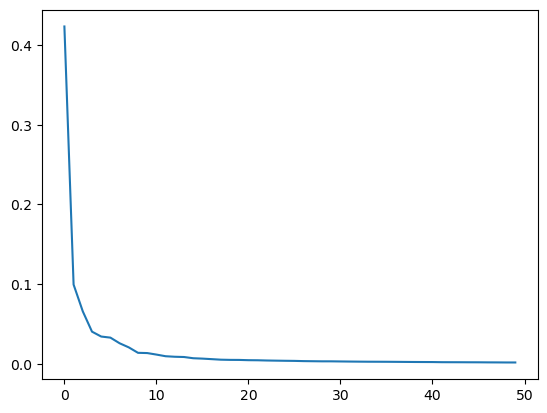

In [58]:
plt.plot(pca.explained_variance_ratio_)
plt.show()
# 처음 10개의 주성분이 대부분의 분산을 표현
# 그 다음부터는 각 주성분이 설명하고 있는 분산은 비교적 작음

### 다른 알고리즘과 함께 사용하기
원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해 보고, 어떤 차이가 있는지 알아보기

1. 로지스틱 회귀 모델

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# 사과 0, 파인애플 1, 바나나 2(타겟)
target = np.array([0]*100+[1]*100+[2]*100)

In [60]:
# 원본 데이터
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
# 특성이 10000개나 되기 때문에 300개의 샘플에서 과대적합 모델

0.9966666666666667
0.5052425861358643


In [61]:
# PCA로 축소한 데이터
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
# 정확도 100, 시간 20배 이상 감소

1.0
0.024966621398925783


In [64]:
# n_components에 개수 자체를 지정할수 있을 뿐 아니라 설명된 비율도 입력 가능
# 설명된 분산의 50%에 달하는 주성분을 찾는 PCA모델 만들고
# 몇 개의 주성분을 찾았는지 확인
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

2


In [65]:
fruits_pca = pca.transform(fruits_2d)
# 주성분이 2개이므로 변환된 데이터의 크기는 (300,2)
print(fruits_pca.shape)

(300, 2)


In [66]:
# 2개의 특성만 사용한 교차검증
scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.03801989555358887


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [69]:
# 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터 찾기
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts=True))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


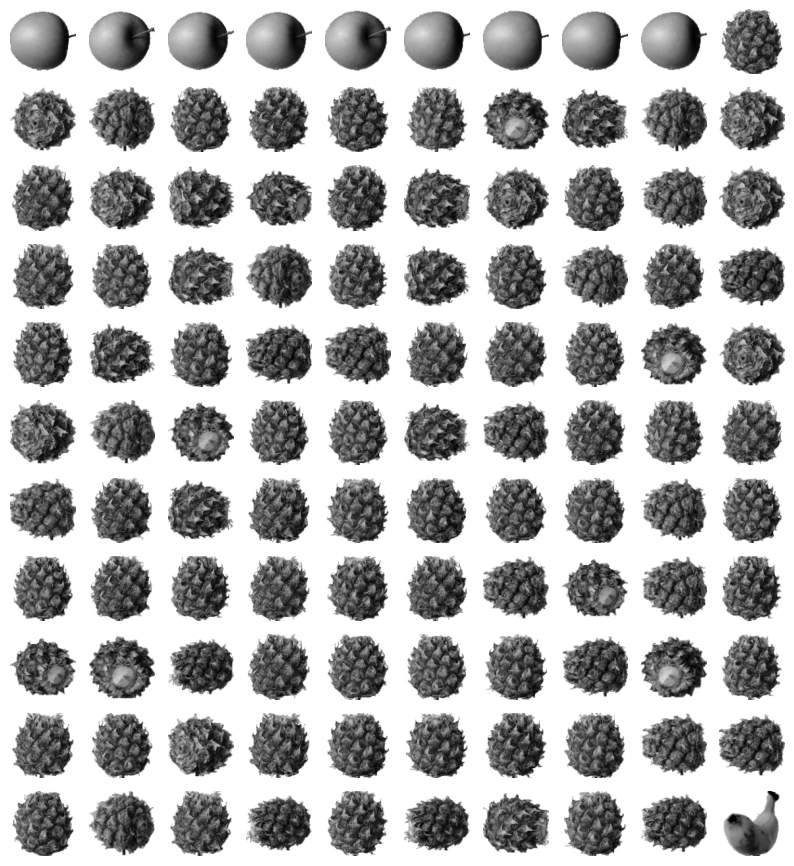

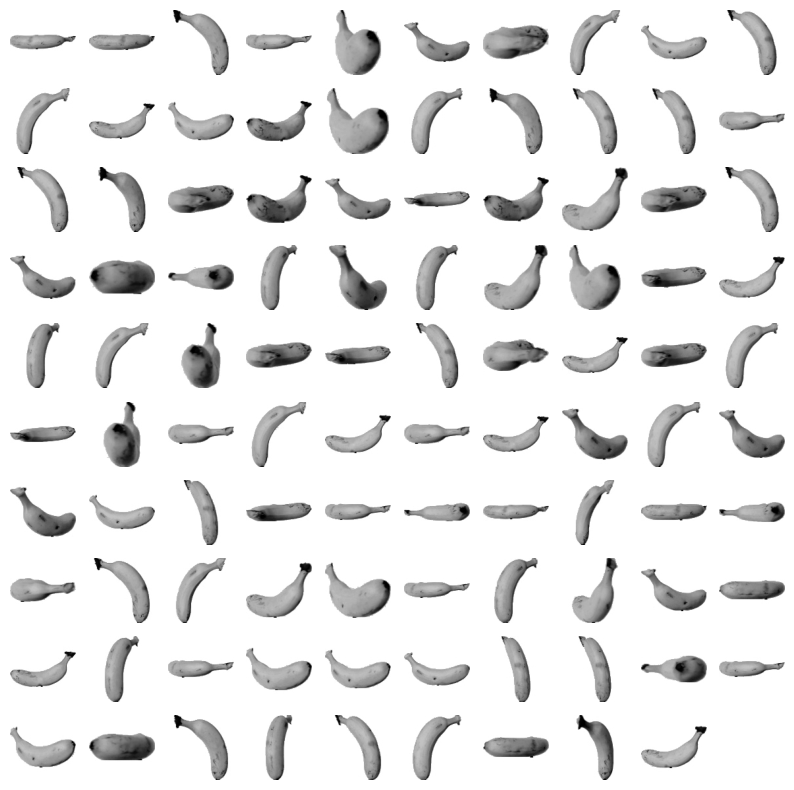

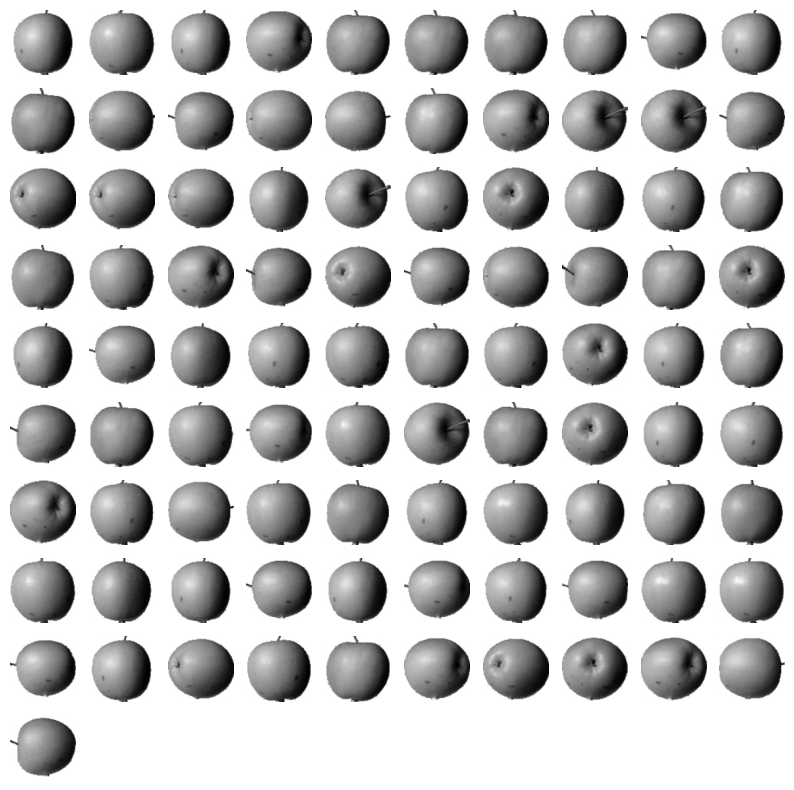

In [70]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_==label])
    print("\n")
# 파인애플과 사과는 조금 혼돈됨

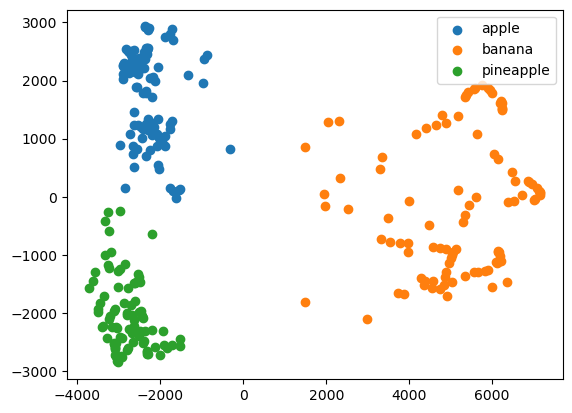

In [72]:
# 3개 이하로 차원을 줄이면 화면에 출력하기 쉬움
# km.labels_를 사용해 클러스터별로 나누어 산점도 표현
for label in range(0,3):
    data=fruits_pca[km.labels_==label]
    plt.scatter(data[:,0],data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()